<a href="https://colab.research.google.com/github/dele22922/tarea3_feat_eng/blob/main/Laboratorio_Transporte_VDELEON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratorio Transporte
## CARNET dele22922@uvg.edu.gt VICTOR DE LEON
## ANTONIO MEDRANO UVG
## CURSO BUSINESS ANALYTICS MODELS




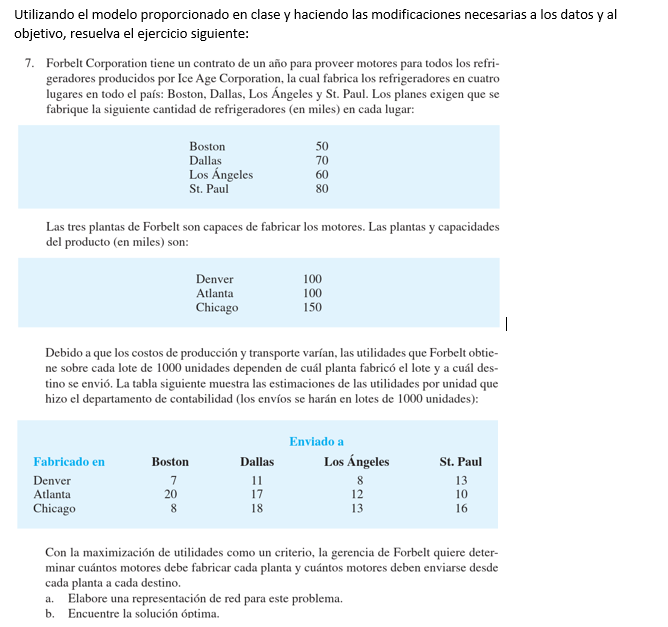

In [1]:
!pip install pulp
from pulp import *
import pandas as pd
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 28.7 MB/s eta 0:00:00


In [2]:
# Matriz de Utilidades
utility_matrix = np.array([[7, 11, 8, 13],
                       [20, 17, 12, 10],
                       [8, 18, 13, 16]])
# Matriz de Demandas
cust_demands = np.array([50,70, 60, 80])

# Matrix de Supply
warehouse_supply = np.array([100,100,150])

n_warehouses = len(warehouse_supply)
n_customers = len(cust_demands)

In [3]:
model = LpProblem("Supply-Demand-Problem", LpMaximize)

In [4]:
variable_names = [str(i)+str(j) for j in range(1, n_customers+1) for i in range(1, n_warehouses+1)]
variable_names.sort()
print("Variable Indices:", variable_names)

Variable Indices: ['11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34']


In [5]:
variable_names

['11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34']

In [6]:
DV_variables = LpVariable.matrix("X", variable_names, cat = "Integer", lowBound= 0 )
allocation = np.array(DV_variables).reshape(3,4)
print("Decision Variable/Allocation Matrix: ")
print(allocation)

Decision Variable/Allocation Matrix: 
[[X_11 X_12 X_13 X_14]
 [X_21 X_22 X_23 X_24]
 [X_31 X_32 X_33 X_34]]


In [7]:
obj_func = lpSum(allocation*utility_matrix)
print(obj_func)
model +=  obj_func
print(model)

7*X_11 + 11*X_12 + 8*X_13 + 13*X_14 + 20*X_21 + 17*X_22 + 12*X_23 + 10*X_24 + 8*X_31 + 18*X_32 + 13*X_33 + 16*X_34
Supply-Demand-Problem:
MAXIMIZE
7*X_11 + 11*X_12 + 8*X_13 + 13*X_14 + 20*X_21 + 17*X_22 + 12*X_23 + 10*X_24 + 8*X_31 + 18*X_32 + 13*X_33 + 16*X_34 + 0
VARIABLES
0 <= X_11 Integer
0 <= X_12 Integer
0 <= X_13 Integer
0 <= X_14 Integer
0 <= X_21 Integer
0 <= X_22 Integer
0 <= X_23 Integer
0 <= X_24 Integer
0 <= X_31 Integer
0 <= X_32 Integer
0 <= X_33 Integer
0 <= X_34 Integer



In [8]:
#Supply Constraints
for i in range(n_warehouses):
#    print(lpSum(allocation[i][j] for j in range(n_customers)) <= warehouse_supply[i])
#model += lpSum(allocation[i][j] for j in range(n_customers)) <= warehouse_supply[i], "Supply Constraints " + str(i)
#print(model)

#for j in range(n_customers):
    print(lpSum(allocation[i][j] for j in range(n_customers)) <= warehouse_supply[i])
    model += lpSum(allocation[i][j] for j in range(n_customers)) <= warehouse_supply[i] , "Supply Constraints " + str(i)
    print(model)

X_11 + X_12 + X_13 + X_14 <= 100
Supply-Demand-Problem:
MAXIMIZE
7*X_11 + 11*X_12 + 8*X_13 + 13*X_14 + 20*X_21 + 17*X_22 + 12*X_23 + 10*X_24 + 8*X_31 + 18*X_32 + 13*X_33 + 16*X_34 + 0
SUBJECT TO
Supply_Constraints_0: X_11 + X_12 + X_13 + X_14 <= 100

VARIABLES
0 <= X_11 Integer
0 <= X_12 Integer
0 <= X_13 Integer
0 <= X_14 Integer
0 <= X_21 Integer
0 <= X_22 Integer
0 <= X_23 Integer
0 <= X_24 Integer
0 <= X_31 Integer
0 <= X_32 Integer
0 <= X_33 Integer
0 <= X_34 Integer

X_21 + X_22 + X_23 + X_24 <= 100
Supply-Demand-Problem:
MAXIMIZE
7*X_11 + 11*X_12 + 8*X_13 + 13*X_14 + 20*X_21 + 17*X_22 + 12*X_23 + 10*X_24 + 8*X_31 + 18*X_32 + 13*X_33 + 16*X_34 + 0
SUBJECT TO
Supply_Constraints_0: X_11 + X_12 + X_13 + X_14 <= 100

Supply_Constraints_1: X_21 + X_22 + X_23 + X_24 <= 100

VARIABLES
0 <= X_11 Integer
0 <= X_12 Integer
0 <= X_13 Integer
0 <= X_14 Integer
0 <= X_21 Integer
0 <= X_22 Integer
0 <= X_23 Integer
0 <= X_24 Integer
0 <= X_31 Integer
0 <= X_32 Integer
0 <= X_33 Integer
0 <= X_

In [9]:
print(model)

Supply-Demand-Problem:
MAXIMIZE
7*X_11 + 11*X_12 + 8*X_13 + 13*X_14 + 20*X_21 + 17*X_22 + 12*X_23 + 10*X_24 + 8*X_31 + 18*X_32 + 13*X_33 + 16*X_34 + 0
SUBJECT TO
Supply_Constraints_0: X_11 + X_12 + X_13 + X_14 <= 100

Supply_Constraints_1: X_21 + X_22 + X_23 + X_24 <= 100

Supply_Constraints_2: X_31 + X_32 + X_33 + X_34 <= 150

VARIABLES
0 <= X_11 Integer
0 <= X_12 Integer
0 <= X_13 Integer
0 <= X_14 Integer
0 <= X_21 Integer
0 <= X_22 Integer
0 <= X_23 Integer
0 <= X_24 Integer
0 <= X_31 Integer
0 <= X_32 Integer
0 <= X_33 Integer
0 <= X_34 Integer



In [10]:
# Demand Constraints
for j in range(n_customers):
    print(lpSum(allocation[i][j] for i in range(n_warehouses)) >= cust_demands[j])
    model += lpSum(allocation[i][j] for i in range(n_warehouses)) >= cust_demands[j] , "Demand Constraints " + str(j)

X_11 + X_21 + X_31 >= 50
X_12 + X_22 + X_32 >= 70
X_13 + X_23 + X_33 >= 60
X_14 + X_24 + X_34 >= 80


In [11]:
print(model)

Supply-Demand-Problem:
MAXIMIZE
7*X_11 + 11*X_12 + 8*X_13 + 13*X_14 + 20*X_21 + 17*X_22 + 12*X_23 + 10*X_24 + 8*X_31 + 18*X_32 + 13*X_33 + 16*X_34 + 0
SUBJECT TO
Supply_Constraints_0: X_11 + X_12 + X_13 + X_14 <= 100

Supply_Constraints_1: X_21 + X_22 + X_23 + X_24 <= 100

Supply_Constraints_2: X_31 + X_32 + X_33 + X_34 <= 150

Demand_Constraints_0: X_11 + X_21 + X_31 >= 50

Demand_Constraints_1: X_12 + X_22 + X_32 >= 70

Demand_Constraints_2: X_13 + X_23 + X_33 >= 60

Demand_Constraints_3: X_14 + X_24 + X_34 >= 80

VARIABLES
0 <= X_11 Integer
0 <= X_12 Integer
0 <= X_13 Integer
0 <= X_14 Integer
0 <= X_21 Integer
0 <= X_22 Integer
0 <= X_23 Integer
0 <= X_24 Integer
0 <= X_31 Integer
0 <= X_32 Integer
0 <= X_33 Integer
0 <= X_34 Integer



In [12]:
print(model)

Supply-Demand-Problem:
MAXIMIZE
7*X_11 + 11*X_12 + 8*X_13 + 13*X_14 + 20*X_21 + 17*X_22 + 12*X_23 + 10*X_24 + 8*X_31 + 18*X_32 + 13*X_33 + 16*X_34 + 0
SUBJECT TO
Supply_Constraints_0: X_11 + X_12 + X_13 + X_14 <= 100

Supply_Constraints_1: X_21 + X_22 + X_23 + X_24 <= 100

Supply_Constraints_2: X_31 + X_32 + X_33 + X_34 <= 150

Demand_Constraints_0: X_11 + X_21 + X_31 >= 50

Demand_Constraints_1: X_12 + X_22 + X_32 >= 70

Demand_Constraints_2: X_13 + X_23 + X_33 >= 60

Demand_Constraints_3: X_14 + X_24 + X_34 >= 80

VARIABLES
0 <= X_11 Integer
0 <= X_12 Integer
0 <= X_13 Integer
0 <= X_14 Integer
0 <= X_21 Integer
0 <= X_22 Integer
0 <= X_23 Integer
0 <= X_24 Integer
0 <= X_31 Integer
0 <= X_32 Integer
0 <= X_33 Integer
0 <= X_34 Integer



In [16]:
#model.solve()
model.solve()

status =  LpStatus[model.status]

print(status)

Optimal


In [17]:
print("Total Cost:", model.objective.value())

# Decision Variables

for v in model.variables():
    try:
        print(v.name,"=", v.value())
    except:
        print("error couldnt find value")

Total Cost: 5700.0
X_11 = 0.0
X_12 = 0.0
X_13 = 20.0
X_14 = 80.0
X_21 = 100.0
X_22 = 0.0
X_23 = 0.0
X_24 = 0.0
X_31 = 0.0
X_32 = 110.0
X_33 = 40.0
X_34 = 0.0


In [18]:
# Warehouse 1 and Warehouse 2 required capacity

for i in range(n_warehouses):
    print("Warehouse ", str(i+1))
    print(lpSum(allocation[i][j].value() for j in range(n_customers)))

Warehouse  1
100.0
Warehouse  2
100.0
Warehouse  3
150.0
